For Text Mining assignment

1) Extract reviews of any product from ecommerce website like amazon 2) Perform emotion mining

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [ ]:
!python -m spacy download en_core_web_sm

2023-12-20 07:18:11.143314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 07:18:11.143380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 07:18:11.144644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 07:18:12.390887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
Nw=pd.read_csv('negative-words.txt',sep='|', encoding='latin-1')
Nw

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4811,zaps
4812,zealot
4813,zealous
4814,zealously


In [ ]:
Nw.columns

Index([';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;'], dtype='object')

In [ ]:
Nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'u'},inplace=True)

In [ ]:
Nw

,u
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4811,zaps
4812,zealot
4813,zealous
4814,zealously


In [ ]:
Nw=[u.strip() for u in Nw.u] # remove both the leading and the trailing characters
Nw=[u for u in Nw if u] # removes empty strings, because they are considered in Python as False
Nw[0:10]

[';',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';']

In [ ]:
# Joining the list into one string/text
Nw_text = ' '.join(Nw)
Nw_text

'; ; Opinion Lexicon: Negative ; ; This file contains a list of NEGATIVE opinion words (or sentiment words). ; ; This file and the papers can all be downloaded from ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; If you use this list, please cite one of the following two papers: ; ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ;       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ;       Washington, USA, ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ;       and Comparing Opinions on the Web." Proceedings of the 14th ;       International World Wide Web conference (WWW-2005), May 10-14, ;       2005, Chiba, Japan. ; ; Notes: ;    1. The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion. ;       See the paper below: ; ;       Bing Liu. "Sent

In [ ]:
#Punctuation
no_punc_text = Nw_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'  Opinion Lexicon Negative   This file contains a list of NEGATIVE opinion words or sentiment words   This file and the papers can all be downloaded from     httpwwwcsuiceduliubFBSsentimentanalysishtml   If you use this list please cite one of the following two papers     Minqing Hu and Bing Liu Mining and Summarizing Customer Reviews        Proceedings of the ACM SIGKDD International Conference on Knowledge        Discovery and Data Mining KDD2004 Aug 2225 2004 Seattle        Washington USA    Bing Liu Minqing Hu and Junsheng Cheng Opinion Observer Analyzing        and Comparing Opinions on the Web Proceedings of the 14th        International World Wide Web conference WWW2005 May 1014        2005 Chiba Japan   Notes     1 The appearance of an opinion word in a sentence does not necessarily        mean that the sentence expresses a positive or negative opinion        See the paper below         Bing Liu Sentiment Analysis and Subjectivity An chapter in           Handbook of Natural La

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Opinion', 'Lexicon', 'Negative', 'This', 'file', 'contains', 'a', 'list', 'of', 'NEGATIVE', 'opinion', 'words', 'or', 'sentiment', 'words', 'This', 'file', 'and', 'the', 'papers', 'can', 'all', 'be', 'downloaded', 'from', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'If', 'you', 'use', 'this', 'list', 'please', 'cite', 'one', 'of', 'the', 'following', 'two', 'papers', 'Minqing', 'Hu', 'and', 'Bing', 'Liu', 'Mining', 'and', 'Summarizing', 'Customer', 'Reviews', 'Proceedings']


In [ ]:
len(text_tokens)

4962

In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...


['Opinion', 'Lexicon', 'Negative', 'This', 'file', 'contains', 'list', 'NEGATIVE', 'opinion', 'words', 'sentiment', 'words', 'This', 'file', 'papers', 'downloaded', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'If', 'use', 'list', 'please', 'cite', 'one', 'following', 'two', 'papers', 'Minqing', 'Hu', 'Bing', 'Liu', 'Mining', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'ACM', 'SIGKDD', 'International', 'Conference', 'Knowledge']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['opinion', 'lexicon', 'negative', 'this', 'file', 'contains', 'list', 'negative', 'opinion', 'words', 'sentiment', 'words', 'this', 'file', 'papers', 'downloaded', 'httpwwwcsuiceduliubfbssentimentanalysishtml', 'if', 'use', 'list', 'please', 'cite', 'one', 'following', 'two']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['opinion', 'lexicon', 'neg', 'thi', 'file', 'contain', 'list', 'neg', 'opinion', 'word', 'sentiment', 'word', 'thi', 'file', 'paper', 'download', 'httpwwwcsuiceduliubfbssentimentanalysishtml', 'if', 'use', 'list', 'pleas', 'cite', 'one', 'follow', 'two', 'paper', 'minq', 'hu', 'bing', 'liu', 'mine', 'summar', 'custom', 'review', 'proceed', 'acm', 'sigkdd', 'intern', 'confer', 'knowledg']


In [ ]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Opinion Lexicon Negative This file contains list NEGATIVE opinion words sentiment words This file papers downloaded httpwwwcsuiceduliubFBSsentimentanalysishtml If use list please cite one following two papers Minqing Hu Bing Liu Mining Summarizing Customer Reviews Proceedings ACM SIGKDD International Conference Knowledge


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['opinion', 'Lexicon', 'Negative', 'this', 'file', 'contain', 'list', 'negative', 'opinion', 'word', 'sentiment', 'word', 'this', 'file', 'paper', 'download', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'if', 'use', 'list', 'please', 'cite', 'one', 'follow', 'two']


#### Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
print(vectorizer.vocabulary_)

{'opinion': 2681, 'lexicon': 2320, 'negative': 2596, 'this': 3619, 'file': 1383, 'contain': 585, 'list': 2335, 'word': 4065, 'sentiment': 3225, 'paper': 2764, 'download': 1134, 'httpwwwcsuiceduliubfbssentimentanalysishtml': 1734, 'if': 1764, 'use': 3945, 'please': 2849, 'cite': 506, 'one': 2676, 'follow': 1425, 'two': 3706, 'minqe': 2459, 'hu': 1735, 'bing': 296, 'liu': 2339, 'mining': 2458, 'summarizing': 3546, 'customer': 676, 'reviews': 3072, 'proceedings': 2913, 'acm': 43, 'sigkdd': 3287, 'international': 2133, 'conference': 560, 'knowledge': 2258, 'discovery': 962, 'data': 695, 'kdd2004': 2250, 'aug': 197, '2225': 5, '2004': 2, 'seattle': 3199, 'washington': 4020, 'usa': 3944, 'minqing': 2460, 'junsheng': 2247, 'cheng': 493, 'observer': 2644, 'analyze': 110, 'comparing': 535, 'opinions': 2683, 'web': 4035, '14th': 1, 'world': 4067, 'wide': 4050, 'www2005': 4099, 'may': 2429, '1014': 0, '2005': 3, 'chiba': 494, 'japan': 2219, 'note': 2622, 'the': 3615, 'appearance': 161, 'sentence'

In [ ]:
print(X.toarray().shape)

(4912, 4107)


In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(Nw)

#Generate wordcloud

In [ ]:

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

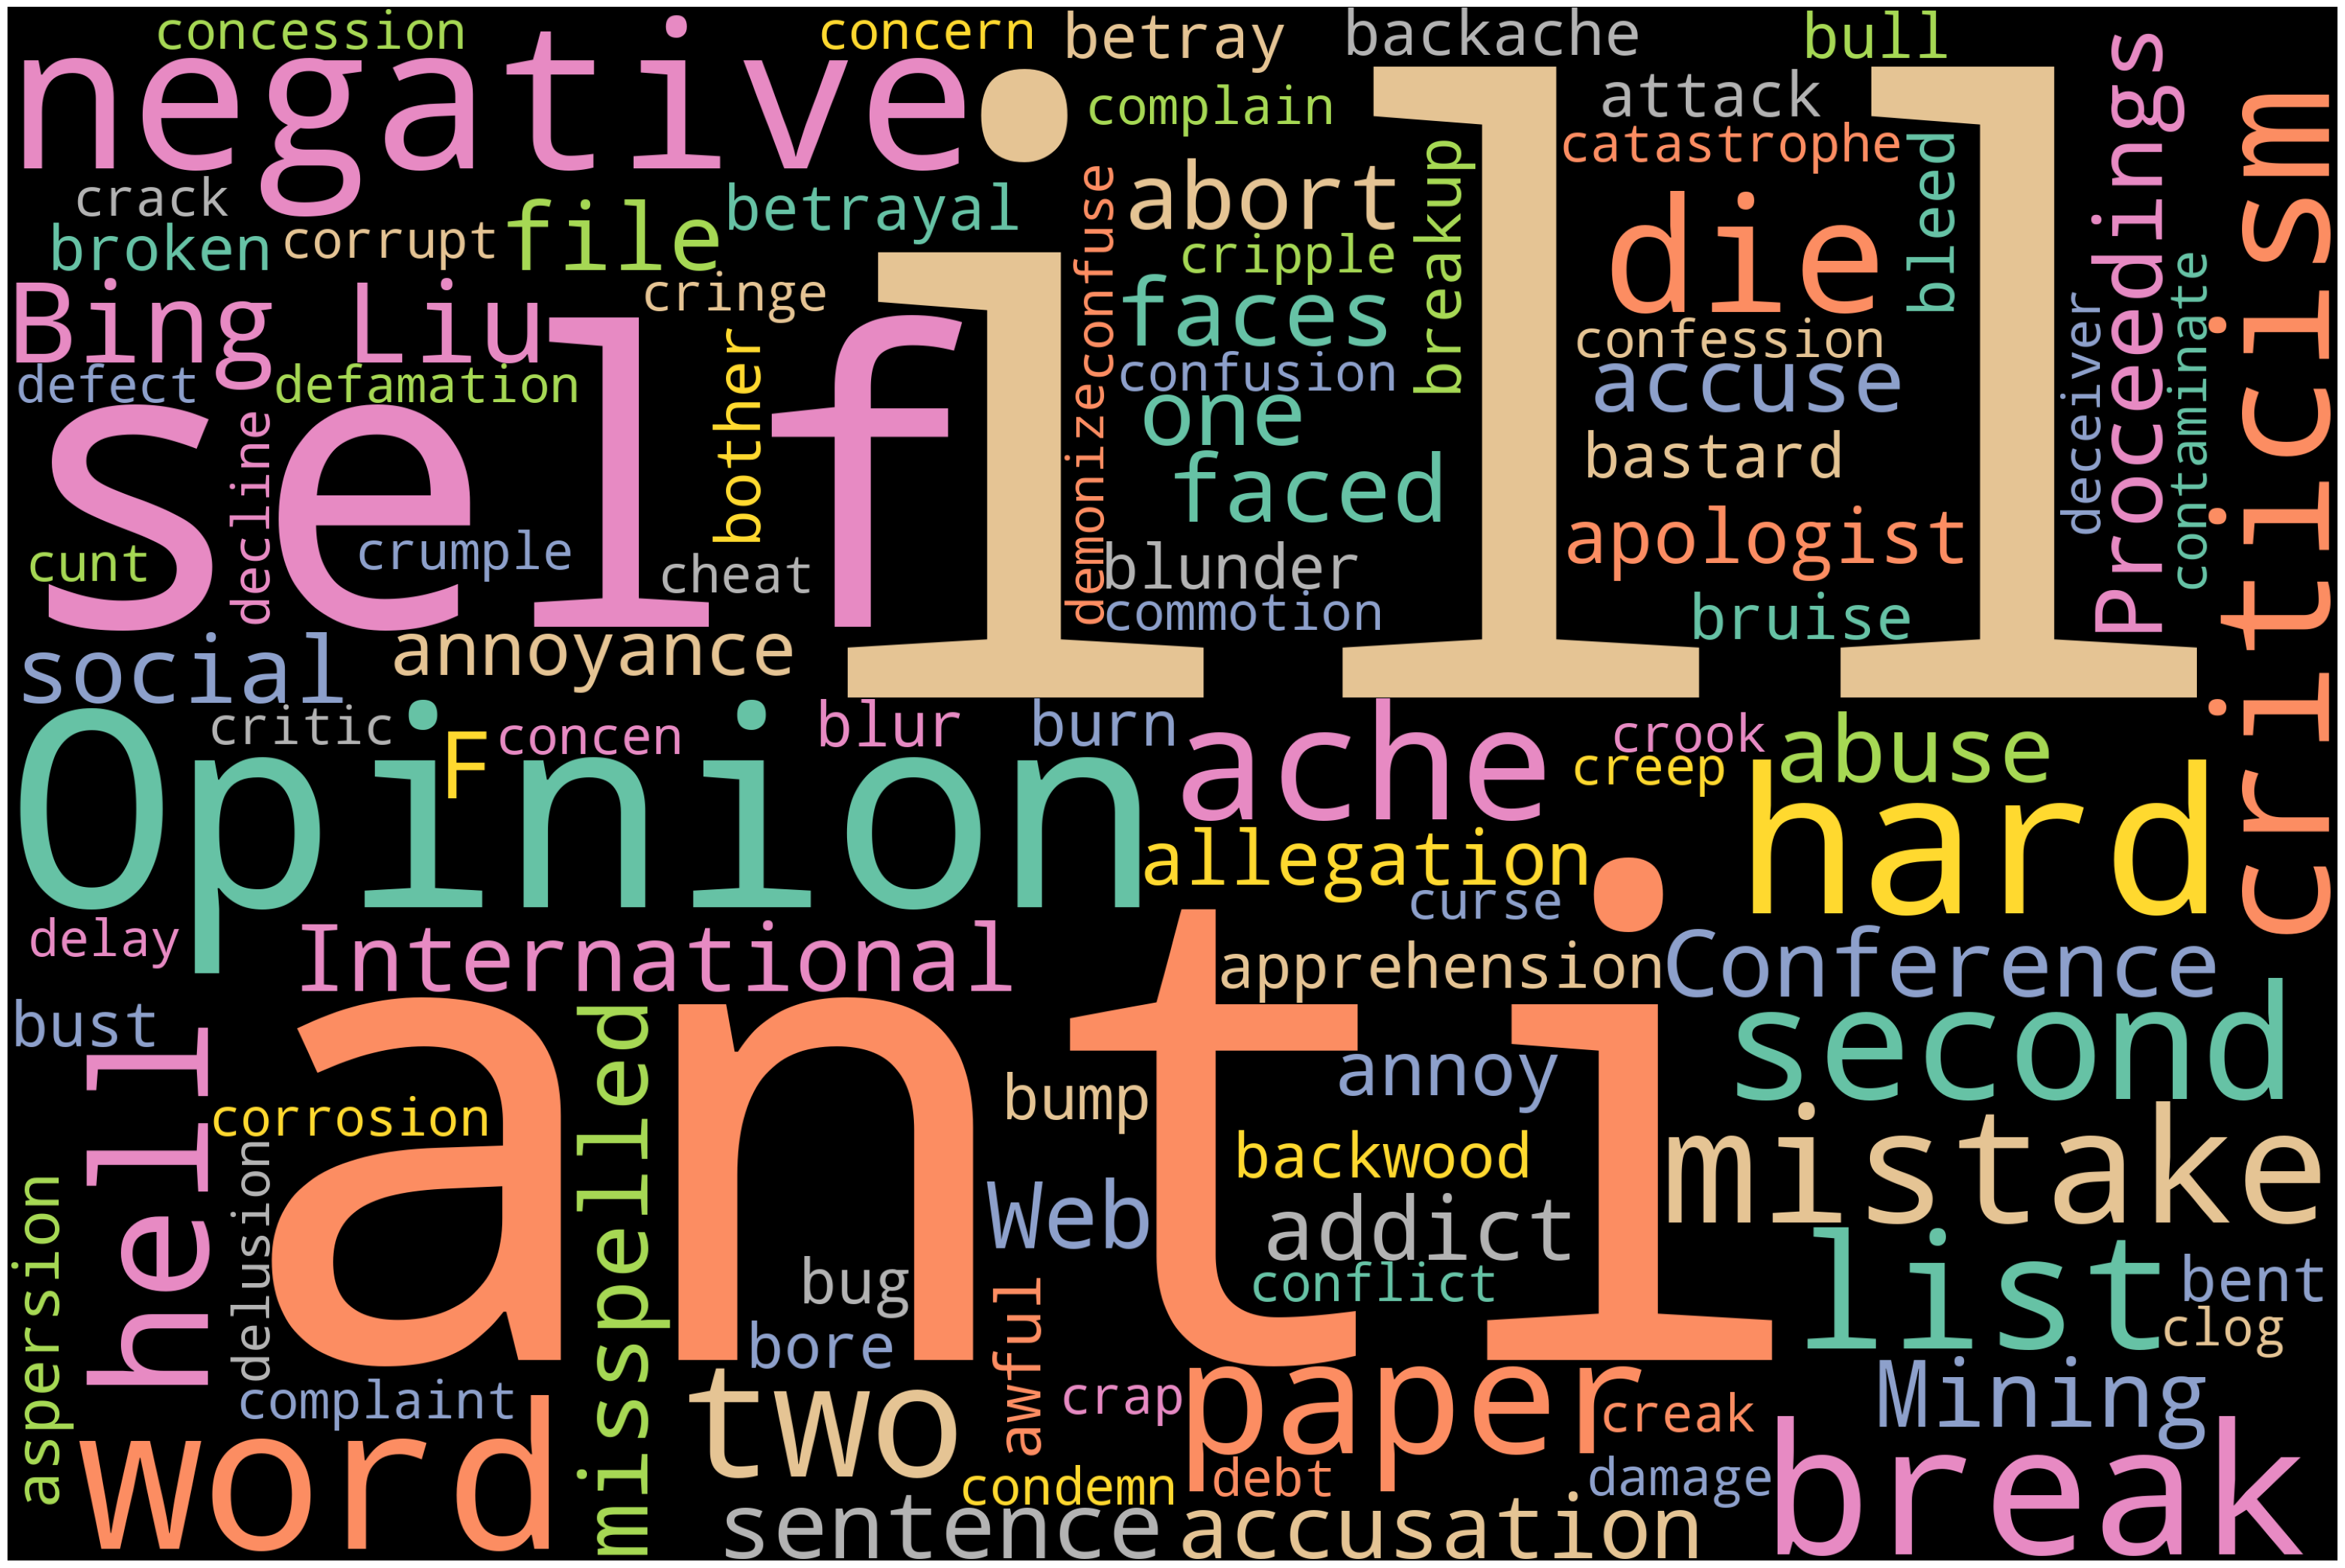

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(Nw_text)
# Plot
plot_cloud(wordcloud)

Named Entity Recognition

In [ ]:
clean_Nw=' '.join(lemmas)
clean_Nw

'opinion Lexicon Negative this file contain list negative opinion word sentiment word this file paper download httpwwwcsuiceduliubFBSsentimentanalysishtml if use list please cite one follow two paper minqe Hu Bing Liu Mining Summarizing Customer Reviews Proceedings ACM SIGKDD International Conference Knowledge Discovery Data Mining kdd2004 Aug 2225 2004 Seattle Washington USA Bing Liu Minqing Hu Junsheng Cheng Opinion Observer analyze Comparing Opinions Web Proceedings 14th International World wide web conference www2005 May 1014 2005 Chiba Japan note 1 the appearance opinion word sentence necessarily mean sentence express positive negative opinion see paper Bing Liu Sentiment Analysis Subjectivity an chapter Handbook Natural Language Processing Second Edition editor N Indurkhya F J Damerau 2010 2 you notice many misspelled word list they mistake they include misspelled word appear frequently social medium content 2face 2faces abnormal abolish abominable abominably abominate abominatio

In [ ]:

##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_Nw
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)